In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestClassifier

#### Reading the dataset that was created in the "2-Feature Extraction" notebook.

In [2]:
df = pd.read_csv('datasets/generated_household_data.csv')
df.head()

,urbrur,hhsize,statocc,rooms,bedrooms,phone,cell,car,bicycle,motorcycle,...,industry_8_per_household,industry_9_per_household,industry_10_per_household,industry_11_per_household,industry_12_per_household,industry_13_per_household,industry_14_per_household,industry_15_per_household,percent_literate,total_children_born
0,2,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100.0,0.0
1,2,1,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,100.0,1.0
2,2,2,1,4,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,100.0,0.0
3,2,2,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,100.0,2.0
4,2,1,2,3,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,100.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 101 entries, urbrur to total_children_born
dtypes: bool(1), float64(16), int64(84)
memory usage: 6.1 MB


In [4]:
df.describe()

,urbrur,hhsize,statocc,rooms,bedrooms,phone,cell,car,bicycle,motorcycle,...,industry_8_per_household,industry_9_per_household,industry_10_per_household,industry_11_per_household,industry_12_per_household,industry_13_per_household,industry_14_per_household,industry_15_per_household,percent_literate,total_children_born
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,7498.000000,8000.000000
mean,1.556250,4.049500,1.325625,2.812750,1.682250,0.225000,0.631125,0.245125,0.146625,0.244125,...,0.078625,0.017625,0.050500,0.075375,0.079375,0.03675,0.055875,0.077875,88.884256,3.332500
std,0.496857,2.135034,0.646255,1.650614,0.892824,0.417608,0.482530,0.430188,0.353754,0.429594,...,0.291468,0.144281,0.233894,0.309363,0.305919,0.20163,0.252509,0.309148,19.898570,3.157719
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,11.111111,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,80.000000,1.000000
50%,2.000000,4.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,100.000000,2.000000
75%,2.000000,5.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,100.000000,5.000000
max,2.000000,22.000000,3.000000,20.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,5.000000,4.000000,4.00000,4.000000,4.000000,100.000000,25.000000


In [5]:
# find the missing values
df.isnull().sum()

urbrur                         0
hhsize                         0
statocc                        0
rooms                          0
bedrooms                       0
                            ... 
industry_13_per_household      0
industry_14_per_household      0
industry_15_per_household      0
percent_literate             502
total_children_born            0
Length: 101, dtype: int64

In [6]:
# impute the missing values
df['avg_cmr'].fillna(0, inplace=True)
df['percent_literate'].fillna(0, inplace=True)

In [7]:
nominal_categorical = ['urbrur', 'statocc']

binary_categorical = ['phone', 'cell', 'car', 'bicycle', 'motorcycle', 'refrigerator', 'tv', 'radio', 'bank' ]

numerical = ['hhsize', 'rooms', 'bedrooms', 'deaths_12m', 
             
             'exp_01','exp_02','exp_03','exp_04','exp_05','exp_06','exp_07','exp_08','exp_09', 'exp_10','exp_11','exp_12',
             'tot_exp','tot_food','share_food','pc_exp', 'quint_nat', 'hhweight_x', 'popweight', 'hhweight_y', 
             
             'num_children', 'num_elderly', 'num_male', 'num_female', 'average_age', 'housing_density', 'dependency_ratio', 'employment_rate',
             'house_quality_score', 'house_modernity_score', 'lifestyle_score', 'living_conditions_level_score', 'highest_edu_lvl', 'avg_cmr',
             'womens_empowerment_index', 'disability_count', 'unique_religions', 'percent_literate', 'total_children_born',
             
             'health_Data Not Available_per_household', 'health_Healthy Weight_per_household', 'health_Obese_per_household', 
             'health_Overweight_per_household', 'health_Underweight_per_household', 'health_Very Underweight_per_household',
             
             'marstat_1_per_household', 'marstat_2_per_household', 'marstat_3_per_household', 'marstat_4_per_household', 
             
             'migrate_0_per_household', 'migrate_10_per_household', 'migrate_11_per_household', 'migrate_12_per_household', 
             'migrate_20_per_household', 'migrate_30_per_household', 'migrate_99_per_household', 
             
             'occupation_0_per_household', 'occupation_1_per_household', 'occupation_2_per_household', 'occupation_3_per_household',
             'occupation_4_per_household', 'occupation_5_per_household', 'occupation_6_per_household', 'occupation_7_per_household',
             'occupation_8_per_household', 'occupation_9_per_household', 'occupation_10_per_household', 'occupation_11_per_household', 'industry_0_per_household',
             
             'industry_1_per_household', 'industry_2_per_household', 'industry_3_per_household', 'industry_4_per_household', 'industry_5_per_household',
             'industry_6_per_household', 'industry_7_per_household', 'industry_8_per_household', 'industry_9_per_household', 'industry_10_per_household',
             'industry_11_per_household', 'industry_12_per_household', 'industry_13_per_household', 'industry_14_per_household', 'industry_15_per_household']


In [8]:
# one hot encoding the categorical variables
df = pd.get_dummies(df, columns=nominal_categorical, drop_first=True)
df.head()

,hhsize,rooms,bedrooms,phone,cell,car,bicycle,motorcycle,refrigerator,tv,...,industry_11_per_household,industry_12_per_household,industry_13_per_household,industry_14_per_household,industry_15_per_household,percent_literate,total_children_born,urbrur_2,statocc_2,statocc_3
0,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,100.0,0.0,True,False,False
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,100.0,1.0,True,True,False
2,2,4,1,0,1,0,0,0,1,1,...,1,0,0,0,0,100.0,0.0,True,False,False
3,2,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,100.0,2.0,True,False,False
4,1,3,2,1,1,1,0,0,1,1,...,0,0,0,0,0,100.0,0.0,True,True,False


In [9]:
# normalizing the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,hhsize,rooms,bedrooms,phone,cell,car,bicycle,motorcycle,refrigerator,tv,...,industry_11_per_household,industry_12_per_household,industry_13_per_household,industry_14_per_household,industry_15_per_household,percent_literate,total_children_born,urbrur_2,statocc_2,statocc_3
0,0.000000,0.000000,0.076923,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,True,False,False
1,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.04,True,True,False
2,0.047619,0.157895,0.076923,0,1,0,0,0,1,1,...,0.2,0.0,0.0,0.0,0.0,1.0,0.00,True,False,False
3,0.047619,0.000000,0.076923,0,1,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.08,True,False,False
4,0.000000,0.105263,0.153846,1,1,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,True,True,False


In [10]:
# make all features numeric
df['urbrur_2'] = df['urbrur_2'].astype('int64')
df['statocc_2'] = df['statocc_2'].astype('int64')
df['statocc_3'] = df['statocc_3'].astype('int64')
df['polygamous'] = df['polygamous'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 102 entries, hhsize to statocc_3
dtypes: float64(89), int64(13)
memory usage: 6.2 MB


In [11]:
# Splitting the data into train and test sets

y = df['urbrur_2']
X = df.drop(['urbrur_2'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

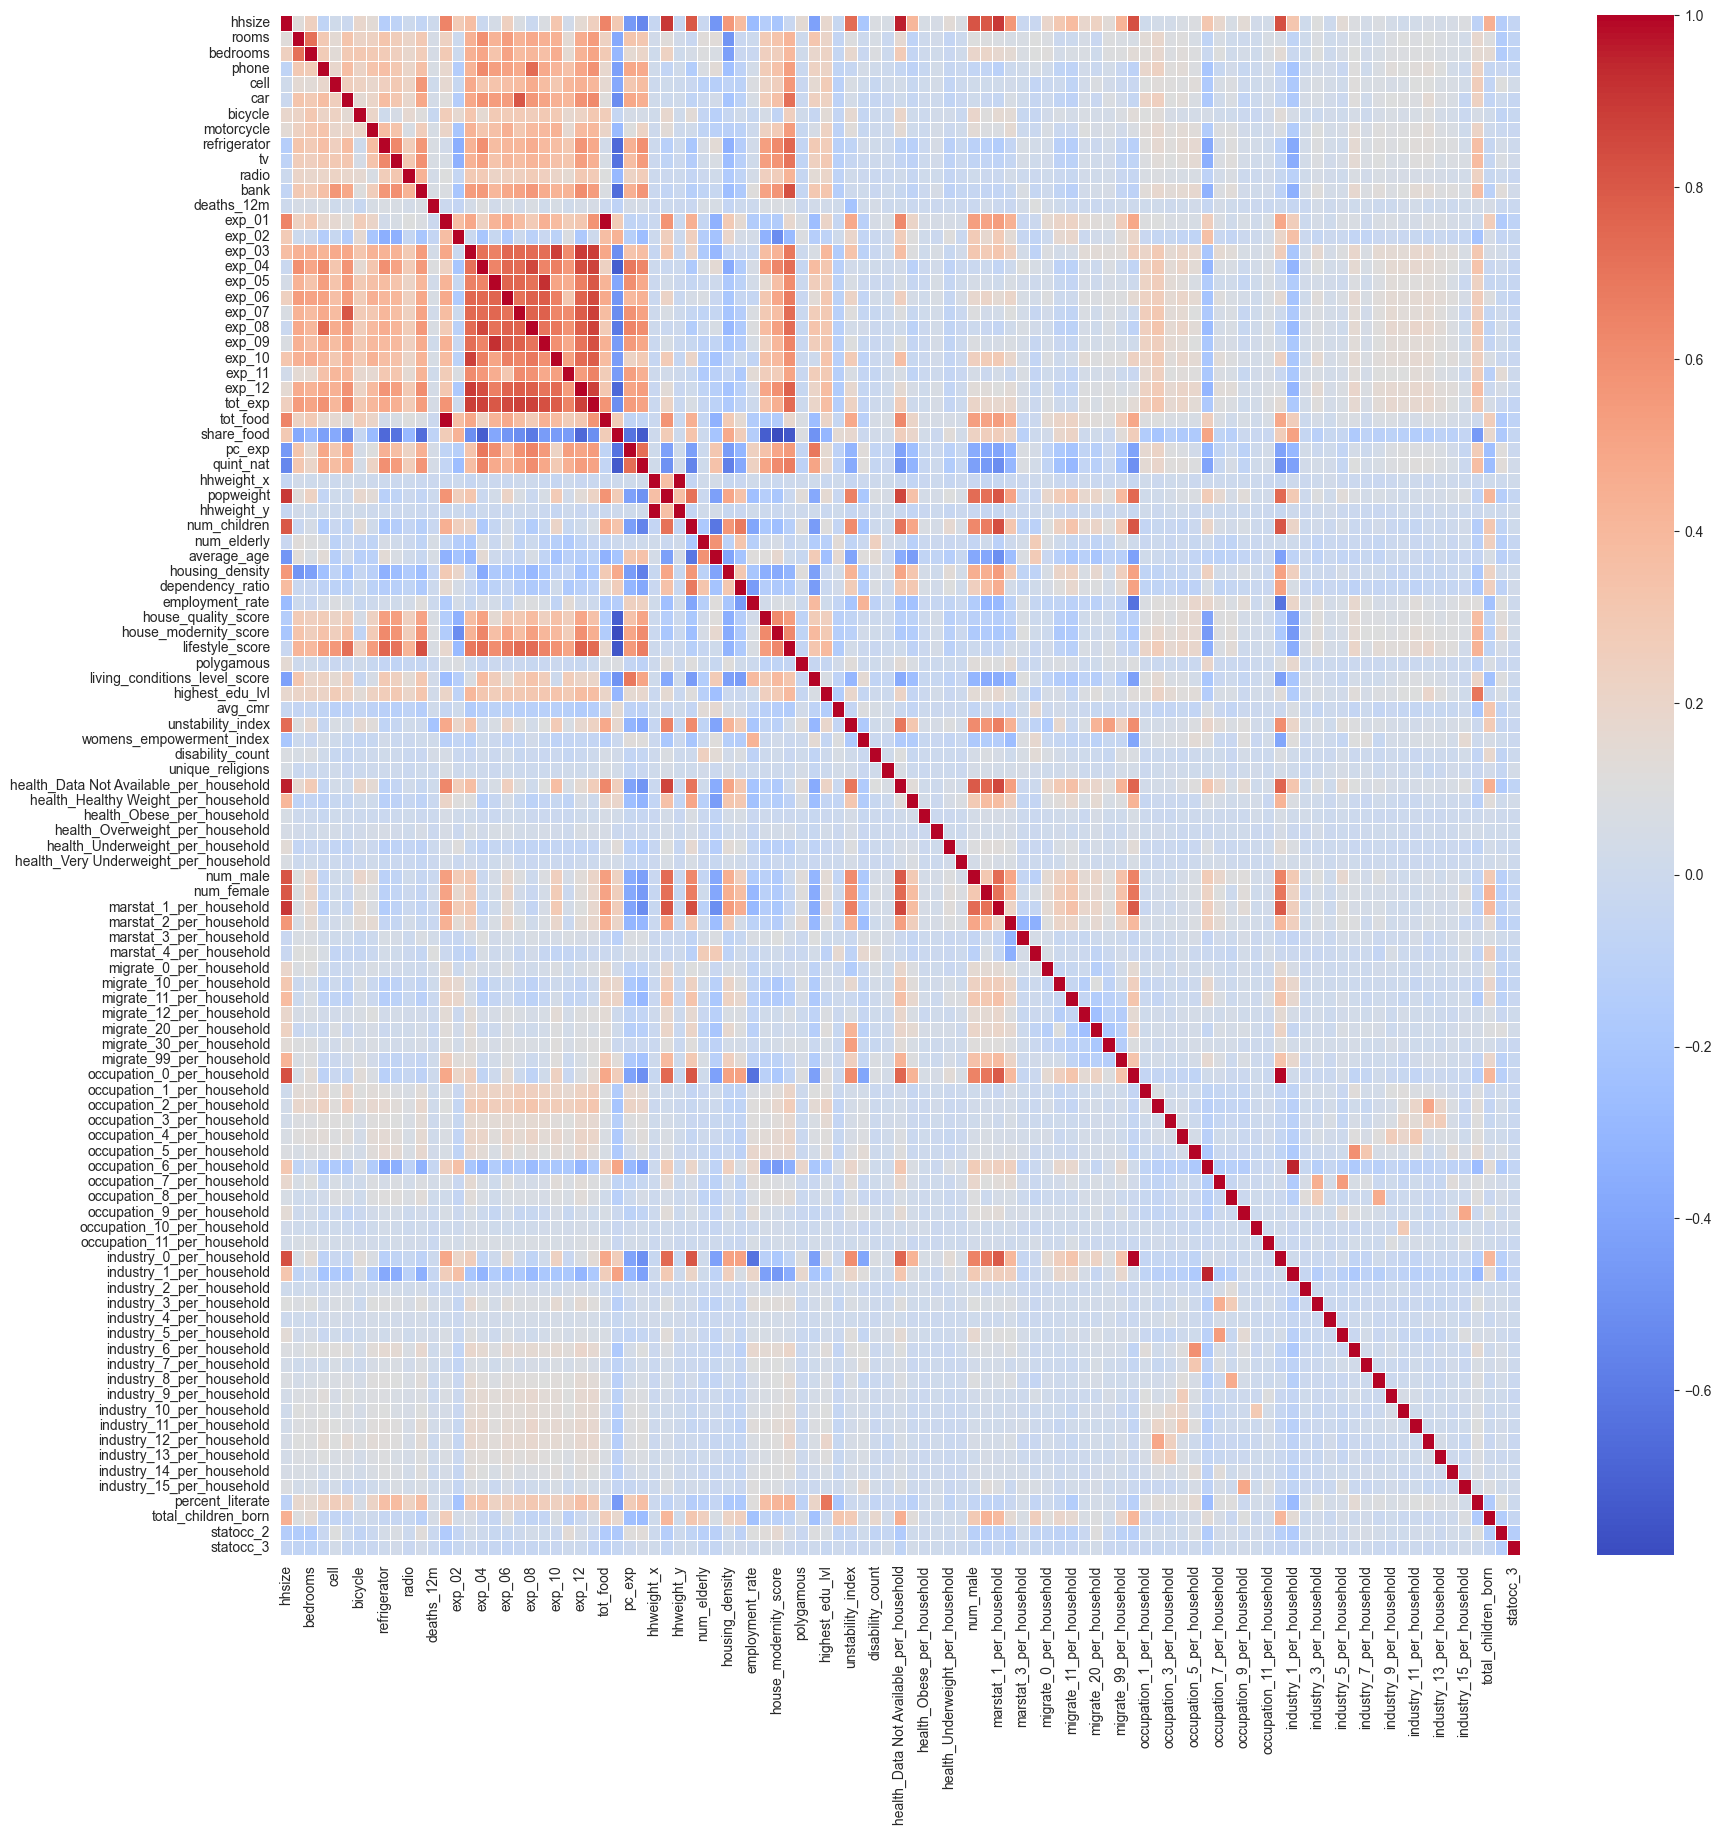

In [12]:
# Correlation Matrix

plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

Another simple measure of multicollinearity is inspection of `variance inflation factor` (VIF) for the $j$th feature, which is defined as:

$$
VIF_{j}=\frac{1}{1-R_{j}^{2}},
$$

where $j=1,2,\ldots,d$, and  $R_{j}^{2}$ is the `coefficient of determination` obtained from regressing $x_{j}$ on the other remaining feature variables. 

Clearly, if $x_{j}$ is `nearly linearly dependent` on some of the other regressors, then $R_{j}^{2}$ will be near unity and $ VIF_{j}$ will be `large`. 

VIFs larger than 10 imply serious problems with multicollinearity. 

In [13]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns  # Column of feature names
vif_df["VIF"] = 0  # Column for VIF values

def calculate_vif(X, idx):
    try:
        return variance_inflation_factor(X, idx)
    except Warning:
        return float('inf')  # Return infinity if divide by zero encountered

with warnings.catch_warnings():
    warnings.simplefilter('error', RuntimeWarning)
    for i in range(len(X_train.columns)):
        vif_df.loc[i, 'VIF'] = calculate_vif(X_train.values, i)

vif_df.sort_values("VIF", ascending=False, inplace=True)

vif_df

,feature,VIF
0,hhsize,inf
63,migrate_10_per_household,inf
72,occupation_3_per_household,inf
71,occupation_2_per_household,inf
70,occupation_1_per_household,inf
...,...,...
45,avg_cmr,1.237598
48,disability_count,1.116761
42,polygamous,1.095153
100,statocc_3,1.090381


In [14]:
def vif_calculator(dataframe, target_feature):

    new_df = dataframe.drop(columns=[target_feature], axis=1)
    vif_df = pd.DataFrame()
    vif_df["Features"] = new_df.columns

    def calculate_vif(X, idx):
        try:
            return variance_inflation_factor(X, idx)
        except Warning:
            return float('inf')

    with warnings.catch_warnings():
        warnings.simplefilter('error', RuntimeWarning)
        vif_df["VIF"] = [calculate_vif(new_df.values, i) for i in range(len(new_df.columns))]

    vif_df.sort_values('VIF', ascending=False, inplace=True)

    return vif_df, new_df

In [15]:
vif_df, new_df = vif_calculator(X_train, 'hhsize')
vif_df

,Features,VIF
50,health_Healthy Weight_per_household,inf
54,health_Very Underweight_per_household,inf
62,migrate_10_per_household,inf
61,migrate_0_per_household,inf
60,marstat_4_per_household,inf
...,...,...
44,avg_cmr,1.237598
47,disability_count,1.116761
41,polygamous,1.095153
99,statocc_3,1.090381


In [16]:
vif_df, new_df = vif_calculator(new_df, 'health_Healthy Weight_per_household')
vif_df

,Features,VIF
40,lifestyle_score,inf
82,industry_3_per_household,inf
59,marstat_4_per_household,inf
58,marstat_3_per_household,inf
57,marstat_2_per_household,inf
...,...,...
98,statocc_3,1.090381
53,health_Very Underweight_per_household,1.061540
51,health_Overweight_per_household,1.056631
48,unique_religions,1.041089


In [17]:
new_df = new_df.drop(columns=binary_categorical, axis=1)
vif_df = pd.DataFrame()
vif_df["Features"] = new_df.columns

def calculate_vif(X, idx):
    try:
        return variance_inflation_factor(X, idx)
    except Warning:
        return float('inf')

with warnings.catch_warnings():
    warnings.simplefilter('error', RuntimeWarning)
    vif_df["VIF"] = [calculate_vif(new_df.values, i) for i in range(len(new_df.columns))]
    
vif_df.sort_values('VIF', ascending=False, inplace=True)
vif_df

,Features,VIF
45,num_male,inf
46,num_female,inf
52,migrate_10_per_household,inf
51,migrate_0_per_household,inf
50,marstat_4_per_household,inf
...,...,...
89,statocc_3,1.087707
44,health_Very Underweight_per_household,1.059540
42,health_Overweight_per_household,1.052287
39,unique_religions,1.039411


In [18]:
vif_df, new_df = vif_calculator(new_df, 'num_male')
vif_df

,Features,VIF
83,industry_14_per_household,inf
52,migrate_11_per_household,inf
76,industry_7_per_household,inf
75,industry_6_per_household,inf
74,industry_5_per_household,inf
...,...,...
88,statocc_3,1.087707
44,health_Very Underweight_per_household,1.059540
42,health_Overweight_per_household,1.052287
39,unique_religions,1.039411


In [19]:
vif_df, new_df = vif_calculator(new_df, 'industry_14_per_household')
vif_df

,Features,VIF
53,migrate_12_per_household,inf
67,occupation_10_per_household,inf
47,marstat_2_per_household,inf
22,hhweight_y,inf
46,marstat_1_per_household,inf
...,...,...
87,statocc_3,1.087707
44,health_Very Underweight_per_household,1.059540
42,health_Overweight_per_household,1.052287
39,unique_religions,1.039411


In [20]:
vif_df, new_df = vif_calculator(new_df, 'migrate_12_per_household')
vif_df

,Features,VIF
63,occupation_7_per_household,inf
20,hhweight_x,inf
47,marstat_2_per_household,inf
48,marstat_3_per_household,inf
49,marstat_4_per_household,inf
...,...,...
86,statocc_3,1.087707
44,health_Very Underweight_per_household,1.059540
42,health_Overweight_per_household,1.052287
39,unique_religions,1.039411


In [21]:
vif_df, new_df = vif_calculator(new_df, 'occupation_7_per_household')
vif_df

,Features,VIF
22,hhweight_y,inf
16,tot_food,inf
3,exp_01,inf
20,hhweight_x,inf
15,tot_exp,7.578675e+04
...,...,...
85,statocc_3,1.087707e+00
44,health_Very Underweight_per_household,1.059540e+00
42,health_Overweight_per_household,1.052287e+00
39,unique_religions,1.039411e+00


In [22]:
vif_df, new_df = vif_calculator(new_df, 'hhweight_y')
vif_df

,Features,VIF
3,exp_01,inf
16,tot_food,inf
15,tot_exp,7.578675e+04
6,exp_04,6.319048e+03
9,exp_07,1.526126e+03
...,...,...
84,statocc_3,1.087707e+00
43,health_Very Underweight_per_household,1.059540e+00
41,health_Overweight_per_household,1.052287e+00
38,unique_religions,1.039411e+00


In [23]:
vif_df, new_df = vif_calculator(new_df, 'exp_01')
vif_df

,Features,VIF
14,tot_exp,75786.752179
15,tot_food,7141.551819
5,exp_04,6319.047618
8,exp_07,1526.125989
11,exp_10,395.500473
...,...,...
83,statocc_3,1.087707
42,health_Very Underweight_per_household,1.059540
40,health_Overweight_per_household,1.052287
37,unique_religions,1.039411


In [24]:
vif_df, new_df = vif_calculator(new_df, 'tot_exp')
vif_df

,Features,VIF
64,industry_0_per_household,564.652505
53,occupation_0_per_household,496.039805
43,marstat_1_per_household,275.329406
44,marstat_2_per_household,156.131409
33,unstability_index,144.835374
...,...,...
36,unique_religions,1.105064
29,polygamous,1.096297
39,health_Overweight_per_household,1.064583
41,health_Very Underweight_per_household,1.061018


In [25]:
vif_df, new_df = vif_calculator(new_df, 'industry_0_per_household')
vif_df

,Features,VIF
43,marstat_1_per_household,251.170624
53,occupation_0_per_household,174.786254
33,unstability_index,144.835172
44,marstat_2_per_household,141.908295
19,popweight,72.942925
...,...,...
36,unique_religions,1.104952
29,polygamous,1.096270
39,health_Overweight_per_household,1.064480
41,health_Very Underweight_per_household,1.060879


In [26]:
vif_df, new_df = vif_calculator(new_df, 'marstat_1_per_household')
vif_df

,Features,VIF
33,unstability_index,125.175841
52,occupation_0_per_household,88.109030
19,popweight,65.960080
4,exp_03,62.467857
37,health_Data Not Available_per_household,45.344584
...,...,...
29,polygamous,1.096213
66,industry_4_per_household,1.096020
39,health_Overweight_per_household,1.063007
41,health_Very Underweight_per_household,1.058849


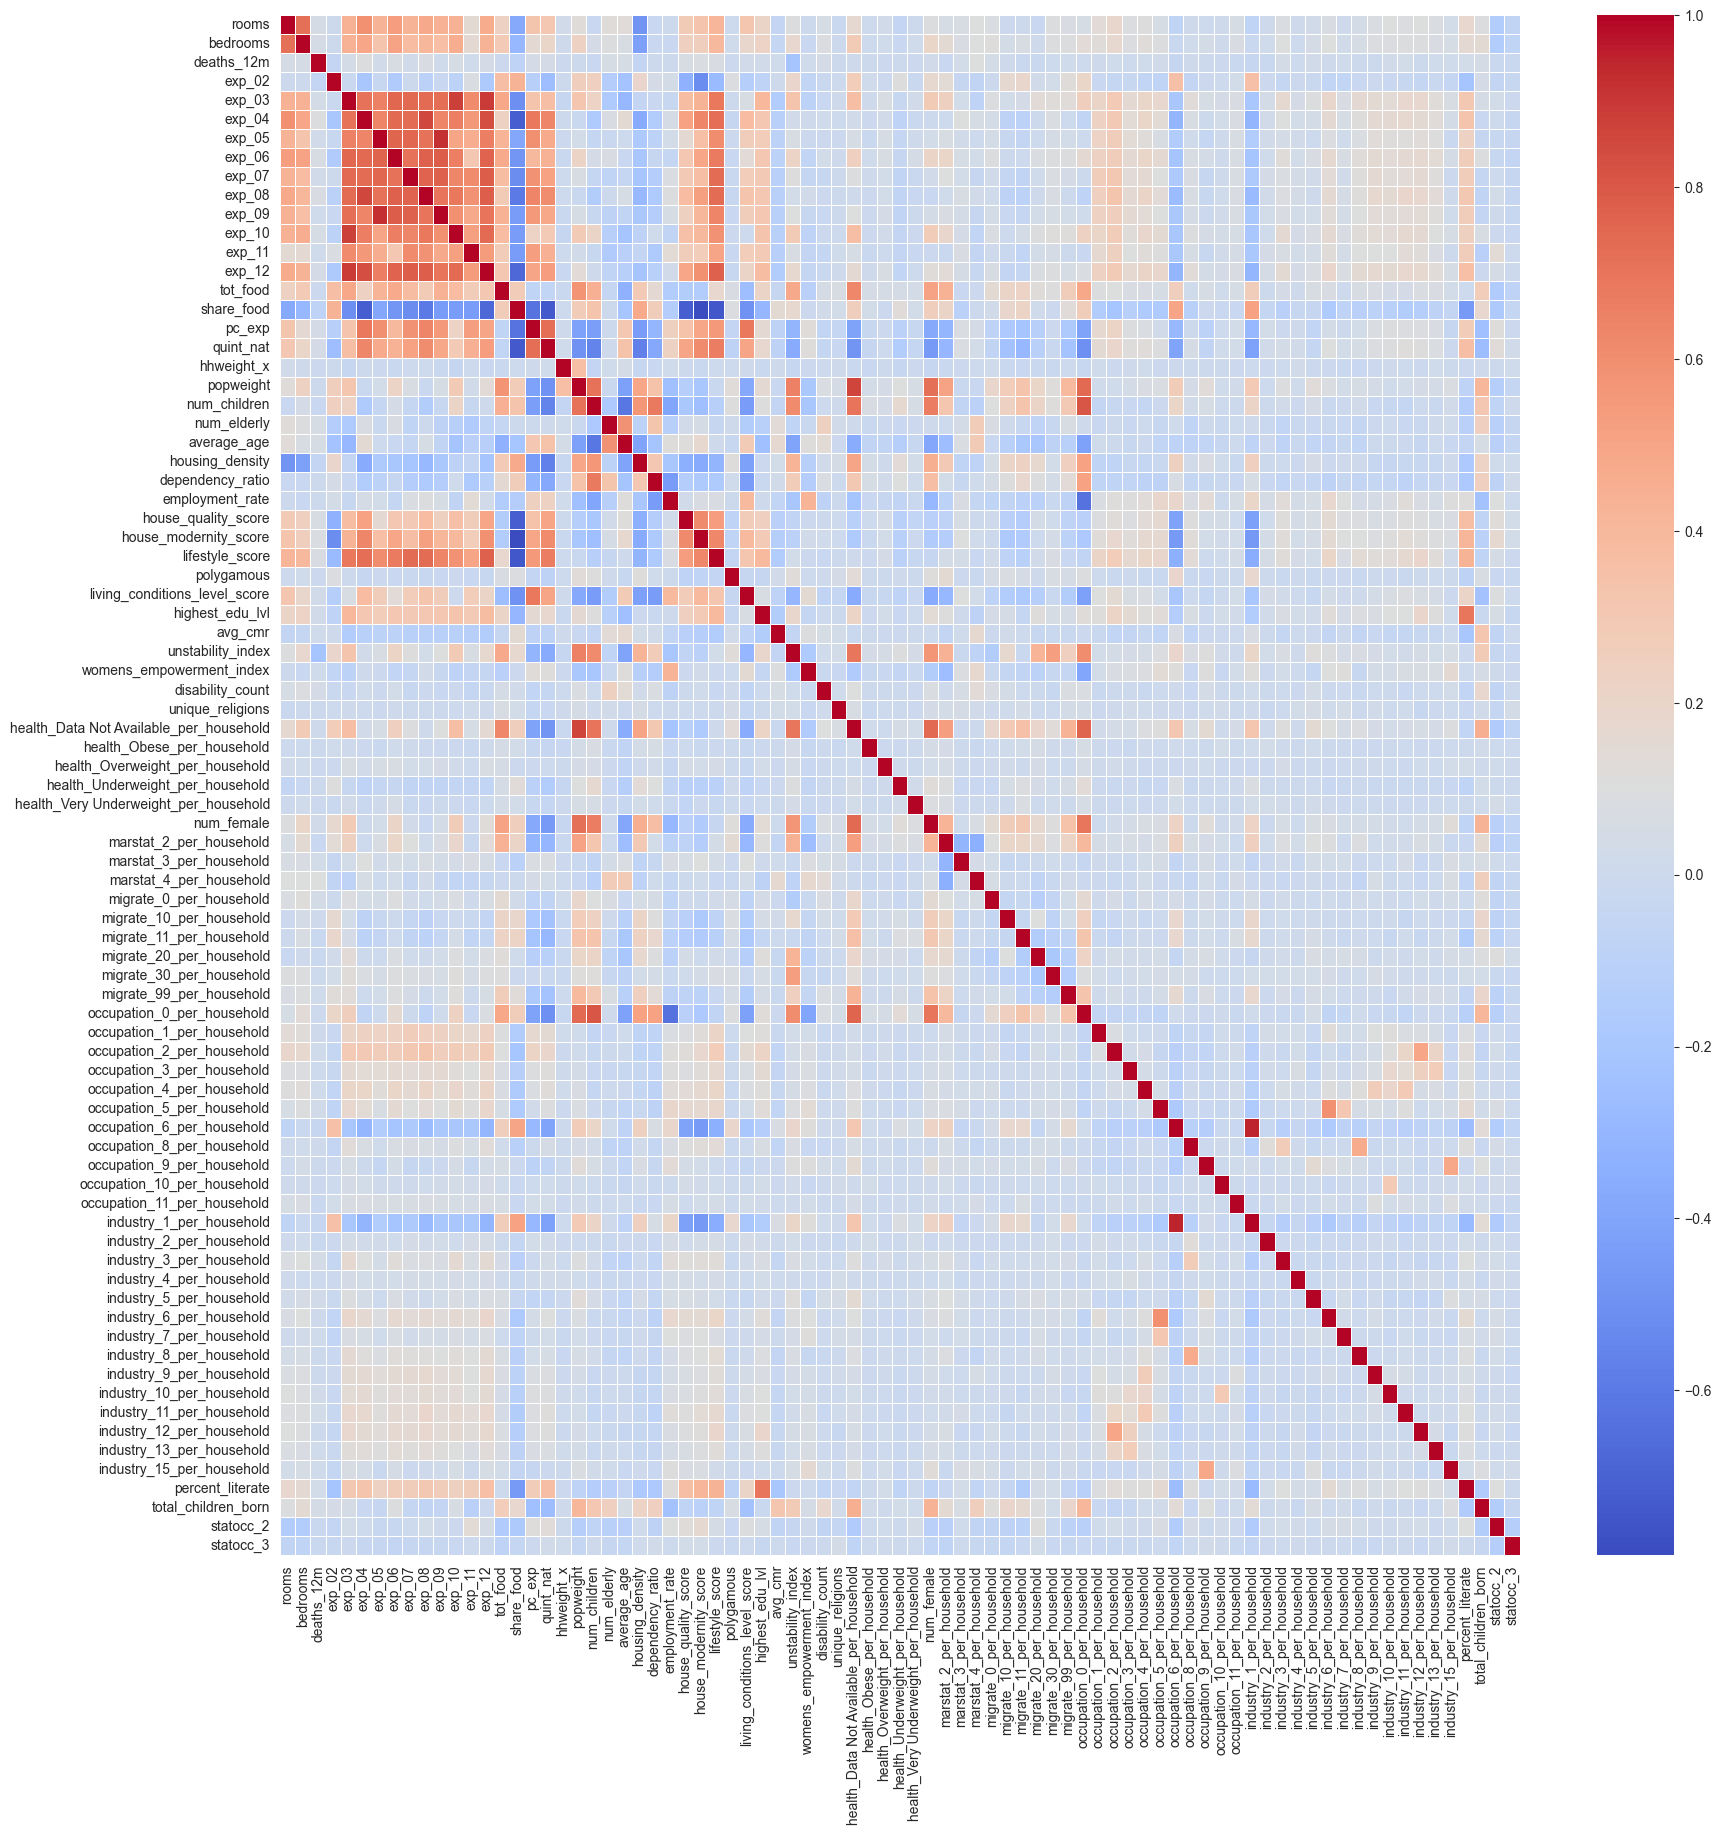

In [27]:
# Correlation Matrix

plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

In [28]:
X_train = new_df

In [29]:
# Feature Selection
def feature_selector(method, X_train, y_train):

    if method == 'selectkbest30':
        selector = SelectKBest(f_classif, k=30)
        selector.fit(X_train, y_train)
        selected_features = X_train.columns[selector.get_support()]

    elif method == 'selectkbest40':
        selector = SelectKBest(f_classif, k=40)
        selector.fit(X_train, y_train)
        selected_features = X_train.columns[selector.get_support()]

    elif method == 'selectkbest50':
        selector = SelectKBest(f_classif, k=50)
        selector.fit(X_train, y_train)
        selected_features = X_train.columns[selector.get_support()]

    elif method == 'selectkbest60':
        selector = SelectKBest(f_classif, k=60)
        selector.fit(X_train, y_train)
        selected_features = X_train.columns[selector.get_support()]

    elif method == 'lasso':
        lasso = LassoCV(cv=5, random_state=2024)
        lasso.fit(X_train, y_train)
        selected_features = X_train.columns[lasso.coef_ != 0]

    elif method == 'ridge':
        ridge = RidgeCV(cv=5)
        ridge.fit(X_train, y_train)
        selected_features = X_train.columns[ridge.coef_ != 0]

    elif method == 'randomforest':
        rf = RandomForestClassifier(n_estimators=100, random_state=2024)
        rf.fit(X_train, y_train)
        selected_features = X_train.columns[rf.feature_importances_ > 0.01]

    else:
        print('Please enter a valid method name!')

    return selected_features

In [30]:
def feature_selector_results(method):

    selected_features = feature_selector(method, X_train, y_train)

    final_df = df[selected_features].copy()
    final_df['urbrur_2'] = df['urbrur_2']

    final_df.to_csv('datasets/' + method + '.csv', index=False)

In [31]:
methods = ['selectkbest30', 'selectkbest40', 'selectkbest50', 'selectkbest60', 'lasso', 'ridge', 'randomforest']

#### Once again saving the final data frame locally to use it in the "4-Modelling" notebook. The data is now ready for modelling processes.

In [32]:
for method in methods:
    feature_selector_results(method)